# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.090319e+01     6.802628e+00
 * time: 0.005959987640380859
     1     2.944595e+01     4.712981e+00
 * time: 0.029228925704956055
     2     2.198632e+01     5.737894e+00
 * time: 0.056810855865478516
     3     1.560921e+01     4.165818e+00
 * time: 0.08466291427612305
     4     1.231028e+01     2.873251e+00
 * time: 0.11106395721435547
     5     9.986934e+00     1.264561e+00
 * time: 0.23905086517333984
     6     9.432794e+00     1.796331e+00
 * time: 0.26073789596557617
     7     8.918988e+00     1.080430e+00
 * time: 0.28252696990966797
     8     8.466764e+00     9.093814e-01
 * time: 0.30402493476867676
     9     8.213814e+00     9.592395e-01
 * time: 0.32611703872680664
    10     8.074803e+00     6.077021e-01
 * time: 0.34815382957458496
    11     8.048735e+00     1.065274e+00
 * time: 0.3646240234375
    12     7.970386e+00     6.802961e-01
 * time: 0.3883960247039795
    13     7.898121e+00     6.721783e-01
 * time: 0

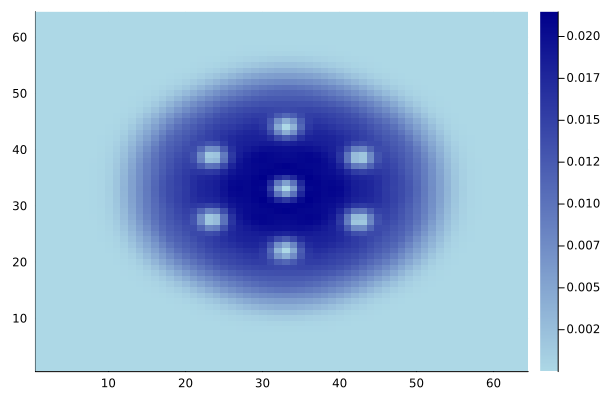

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)